# Titanic Analysis

In [12]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn

  Using cached scikit_learn-1.6.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached scipy-1.15.2-cp313-cp313-macosx_12_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-macosx_12_0_arm64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 21.7 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


### Imports

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Dataset Imports 

In [2]:
# Test Data
test_data = pd.read_csv("../data/test.csv")

# Training Data
train_data = pd.read_csv("../data/train.csv")

To follow standard practice, going to split between the test and training datasets. The training dataset is used to train the model, while I'm going to use the test dataset to do my analysis and evaluate the model.

- Training Set (~70-80%): Used to train the model by adjusting its weights and parameters.
- Testing Set (~20-30%): Used to evaluate the model's performance on unseen data.


In [4]:
# Check data
print('training data: ', train_data.head())
print('test data: ', test_data.head())

training data:     PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

### Objective 1: Answer the questions from the assignment

 "the Notebook should show information such as survivability of different classes of passenger, mean ticket price and other interesting descriptive information."

We are looking for:
- Survivability of different classes of passengers
- Mean ticket price
- Other interesting descriptive information

### Surviving Rates by Passenger Class


Survival rates by passenger class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


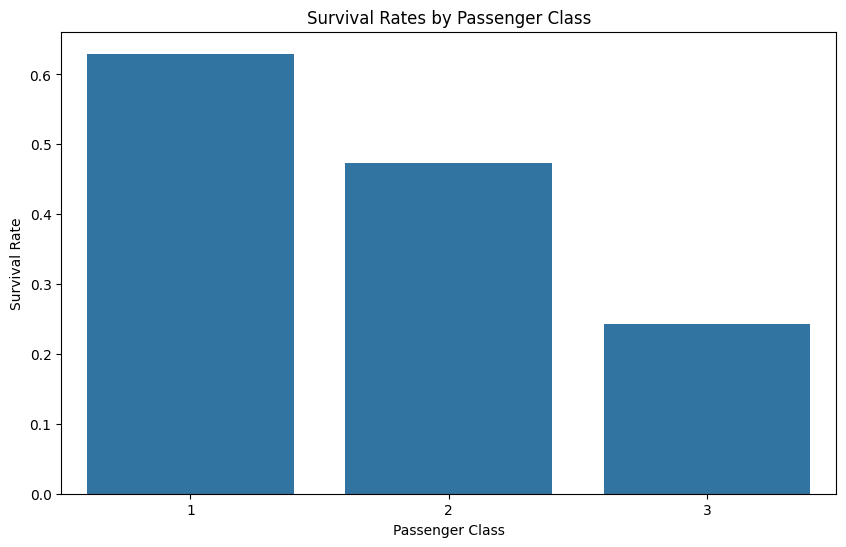

In [5]:
# Calculate survival rates by passenger class
survival_by_class = train_data.groupby('Pclass')['Survived'].mean()
print("\nSurvival rates by passenger class:")
print(survival_by_class)

# Create a visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

### Mean ticket price

In [6]:
print('test data: ', test_data.describe())

test data:         PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


Answer: Can quickly deduce a mean ticket price of $35.63

### Other Interresting Descriptive Information

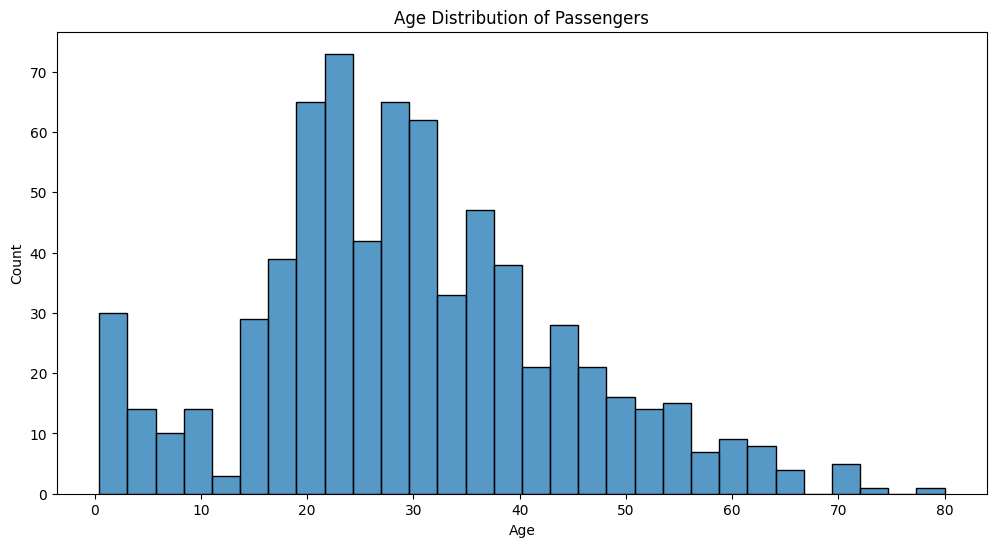

In [ ]:
# Age distribution of passengers
plt.figure(figsize=(12, 6))
sns.histplot(data=train_data, x='Age', bins=30)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

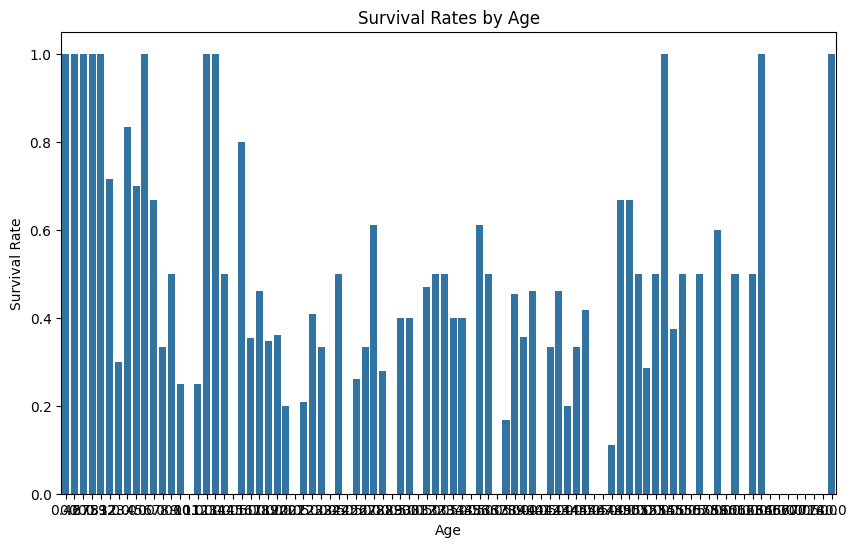

In [10]:
# Survival by age
survival_by_age = train_data.groupby('Age')['Survived'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_by_age.index, y=survival_by_age.values)
plt.title('Survival Rates by Age')
plt.ylabel('Survival Rate')
plt.show()

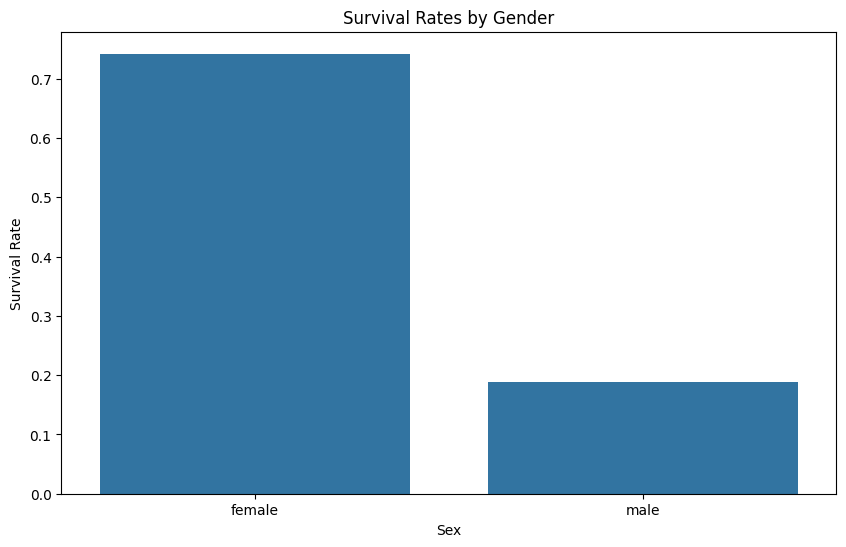

In [8]:
survival_by_sex = train_data.groupby('Sex')['Survived'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values)
plt.title('Survival Rates by Gender')
plt.ylabel('Survival Rate')
plt.show()

### Answers

#### Survivability of different classes of passengers 
1. First Class (Pclass = 1):
   - Highest survival rate: 63%
   - These passengers had nearly 2.6x better chance of survival than third class
   - Likely due to:
     - Cabins being closer to lifeboats
     - Better access to information and deck areas
     - Preferential treatment during evacuation

2. Second Class (Pclass = 2):
   - Medium survival rate: 47%
   - Approximately twice as likely to survive compared to third class
   - Represents middle-class passengers

3. Third Class (Pclass = 3):
   - Lowest survival rate: 24%
   - These passengers faced the highest mortality rate
   - Contributing factors likely included:
     - Location of cabins (lower decks)
     - Limited access to lifeboats
     - Possible language barriers
     - Less access to information during the emergency


#### Mean ticket price 
- $35.63


#### Other interesting descriptive information
##### Age Distribution
- Average passenger age: 29.7 years
- Age range: 5 months to 80 years old
- Most passengers were young adults (20-40 years)

##### Gender Distribution
- Women had a significantly higher survival rate than men
- This aligns with the "women and children first" protocol during the disaster

##### Survival by Age
- Younger passengers (children) had the highest survival rate
- Survival rate decreases with age, with older passengers (60-80) having the lowest survival rate

##### Survival by Gender
- Women had a significantly higher survival rate than men


# Algorithm Selection for Supervised Learning

In this section. I am to cover the 6 key algorithms mentioned in the assignment:
1. Linear Regression
2. Logistic Regression
3. Decision Trees
4. Random Forest
5. Support Vector Machines (SVMs)
6. Naive Bayes
7. K-Nearest Neighbors (KNN)
8. Gradient Boosting Machines (GBMs)

In [28]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

#### Linear Regression
Linear Regression is used to predict a continuous numerical value (like price, temperature, or age) based on one or more input variables. It works by finding the best-fitting straight line (y=mx+b) through the data points. An example would be predicting the fare price based on the passenger's class and age.

In [5]:
# Let's use fare as our target variable first to demonstrate linear regression
# We'll try to predict fare based on passenger class and age
X_fare = train_data[['Pclass', 'Age']].copy()
X_fare['Age'].fillna(X_fare['Age'].mean(), inplace=True)
y_fare = train_data['Fare']

# Split the data
X_train_fare, X_test_fare, y_train_fare, y_test_fare = train_test_split(
    X_fare, y_fare, test_size=0.2, random_state=42
)

/var/folders/sr/60t35rxs16b5bhc31mv2ctvr0000gn/T/ipykernel_73934/2761522081.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_fare['Age'].fillna(X_fare['Age'].mean(), inplace=True)


In [6]:
# Create and train the model
linear_reg = LinearRegression()
linear_reg.fit(X_train_fare, y_train_fare)

# Make predictions
y_pred_fare = linear_reg.predict(X_test_fare)

# Print results
print('Linear Regression Results:')
print('Coefficients:', linear_reg.coef_)
print('Intercept:', linear_reg.intercept_)
print('R² Score:', r2_score(y_test_fare, y_pred_fare))
print('Mean Squared Error:', mean_squared_error(y_test_fare, y_pred_fare))

Linear Regression Results:
Coefficients: [-36.50309599  -0.40443714]
Intercept: 129.58689581776716
R² Score: 0.31964059931659494
Mean Squared Error: 1052.8082884759854


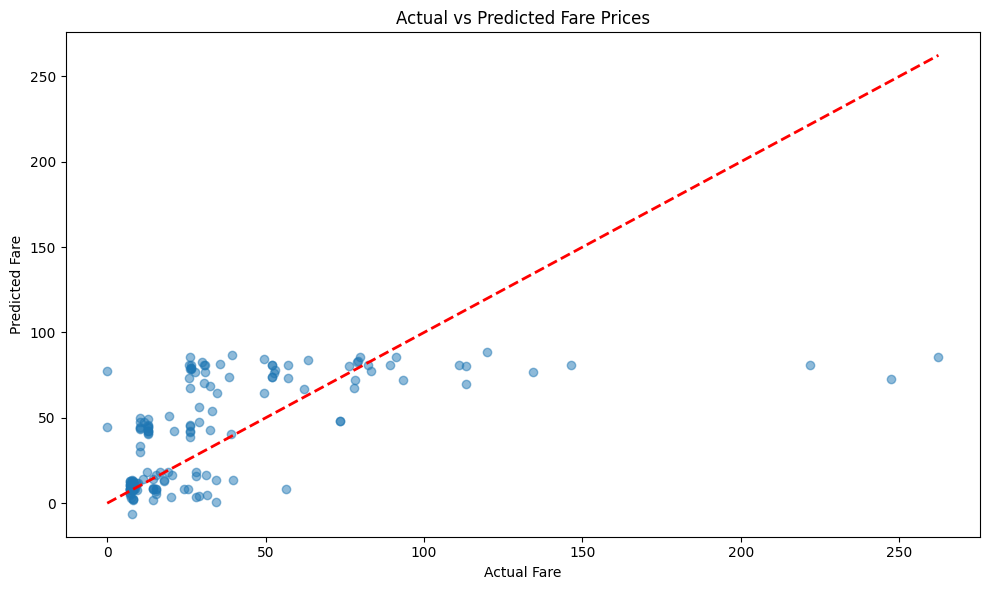

In [7]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_fare, y_pred_fare, alpha=0.5)
plt.plot([y_test_fare.min(), y_test_fare.max()], [y_test_fare.min(), y_test_fare.max()], 'r--', lw=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare Prices')
plt.tight_layout()
plt.show()

### Logistic Regression
Despite its name, Logistic Regression is actually used for classification problems, not regression. It's particularly good for predicting binary outcomes (yes/no, true/false, 1/0) like whether a customer will buy a product, if an email is spam, or in our Titanic case - whether a passenger survived. It works by calculating the probability of an outcome being in a particular category.

In [8]:
# Prepare features (X) and target (y)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = train_data[features].copy()

# Handle missing values and convert categorical to numerical
X['Age'].fillna(X['Age'].mean(), inplace=True)
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
y = train_data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/sr/60t35rxs16b5bhc31mv2ctvr0000gn/T/ipykernel_73934/1509201383.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].mean(), inplace=True)


In [9]:
# Create and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Print results
print('Logistic Regression Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Logistic Regression Results:
Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



#### Decision Tree
Decision Trees are a type of supervised learning algorithm that works by recursively partitioning the data into increasingly homogenous groups. It's particularly good for predicting categorical outcomes (like whether a customer will buy a product, if an email is spam, or in our Titanic case - whether a passenger survived). It works by finding the best-fitting split points in the data to create a tree-like structure.

In [10]:
# Create and train the model
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

print('Decision Tree Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_dt))

Decision Tree Results:
Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



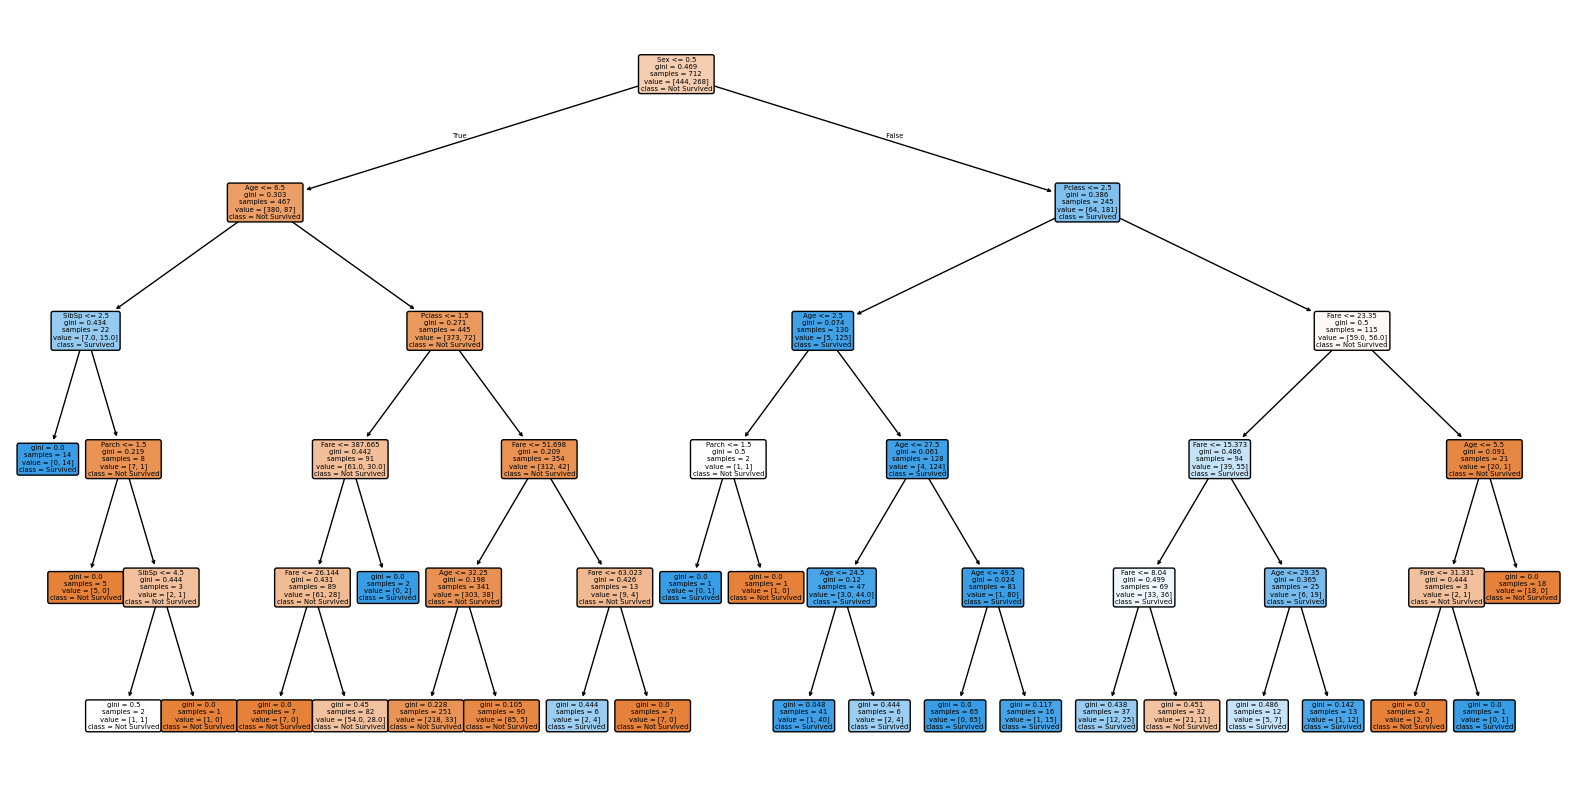

In [11]:
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=features, class_names=['Not Survived', 'Survived'], 
          filled=True, rounded=True)
plt.show()

#### Random Forest
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting. It works by creating multiple trees on random subsets of the data and then averaging their predictions.

In [12]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Print results
print('Random Forest Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



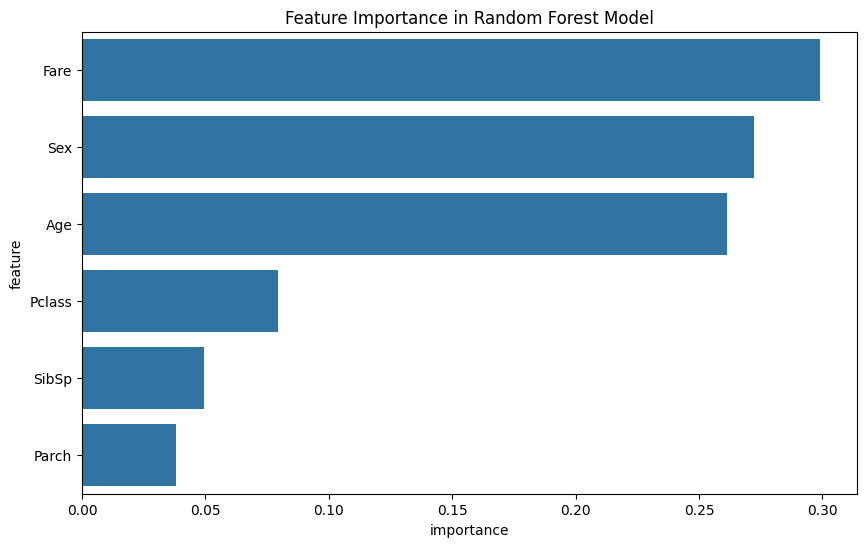

In [13]:
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_classifier.feature_importances_
})
sns.barplot(data=feature_importance.sort_values('importance', ascending=False), 
            x='importance', y='feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()

### Support Vector Machines (SVMs)
Support Vector Machines (SVMs) are a type of supervised learning algorithm that works by finding the best-fitting hyperplane to separate the data into different classes. It's particularly good for predicting categorical outcomes (like whether a customer will buy a product, if an email is spam, or in our Titanic case - whether a passenger survived). It works by finding the best-fitting split points in the data to create a tree-like structure.

In [15]:
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Print results
print('Support Vector Machine Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Results:
Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179



#### Naive Bayes
Naive Bayes is a probabilistic classifier based on Bayes' theorem. It's called "naive" because it assumes all features are independent of each other. Despite this simplifying assumption, it often works surprisingly well, especially for text classification and when you have limited training data. It's particularly good for:
- Text classification (spam detection, sentiment analysis)
- Quick predictions
- Cases where feature independence assumption holds reasonably well
- Situations with limited training data

In [17]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_classifier.predict(X_test)

# Print results
print('Naive Bayes Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_nb))

Naive Bayes Results:
Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       105
           1       0.73      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



#### K-Nearest Neighbors (KNN)
K-Nearest Neighbors (KNN) is a type of supervised learning algorithm that works by finding the K most similar data points in the training set and then using their labels to predict the label of the new data point. It's particularly good for:
- Predicting categorical outcomes (like whether a customer will buy a product, if an email is spam, or in our Titanic case - whether a passenger survived).
- Cases where the data is not linearly separable
- When you have a small training set

In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors=5) 
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)

# Print results
print('K-Nearest Neighbors Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Results:
Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       105
           1       0.65      0.54      0.59        74

    accuracy                           0.69       179
   macro avg       0.68      0.67      0.67       179
weighted avg       0.68      0.69      0.68       179



#### Gradient Boosting Machines (GBMs)
Gradient Boosting Machines (GBMs) are a type of supervised learning algorithm that works by building an ensemble of weak decision trees. It's particularly good for:
- Predicting categorical outcomes (like whether a customer will buy a product, if an email is spam, or in our Titanic case - whether a passenger survived).
- Cases where the data is not linearly separable
- When you have a small training set


Gradient Boosting Machine Results:
Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



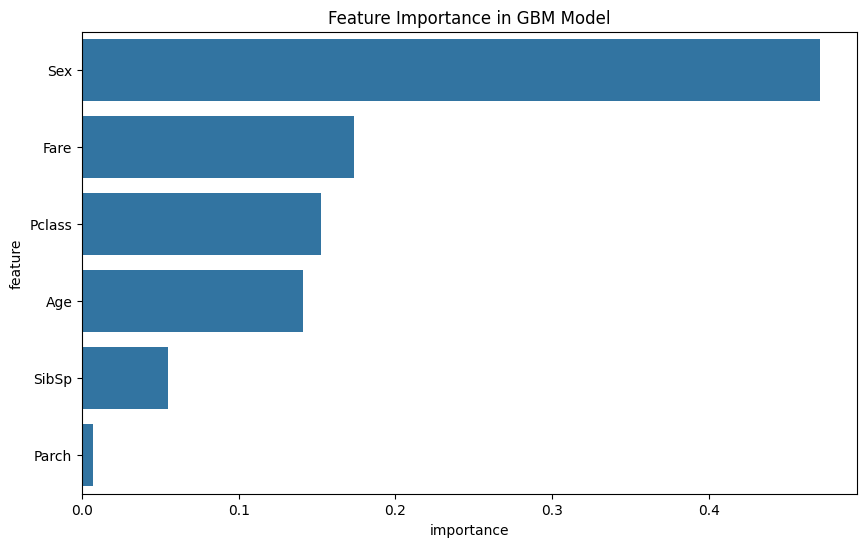

In [21]:
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gbm = gbm_classifier.predict(X_test)

print('Gradient Boosting Machine Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_gbm):.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_gbm))

# Feature importance visualization
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': gbm_classifier.feature_importances_
})
sns.barplot(data=feature_importance.sort_values('importance', ascending=False), 
            x='importance', y='feature')
plt.title('Feature Importance in GBM Model')
plt.show()

#### K-Means Clustering
K-Means Clustering is a type of unsupervised learning algorithm that works by finding the K most similar data points in the training set and then using their labels to predict the label of the new data point. It's particularly good for:
- Predicting categorical outcomes (like whether a customer will buy a product, if an email is spam, or in our Titanic case - whether a passenger survived).
- Cases where the data is not linearly separable
- When you have a small training set

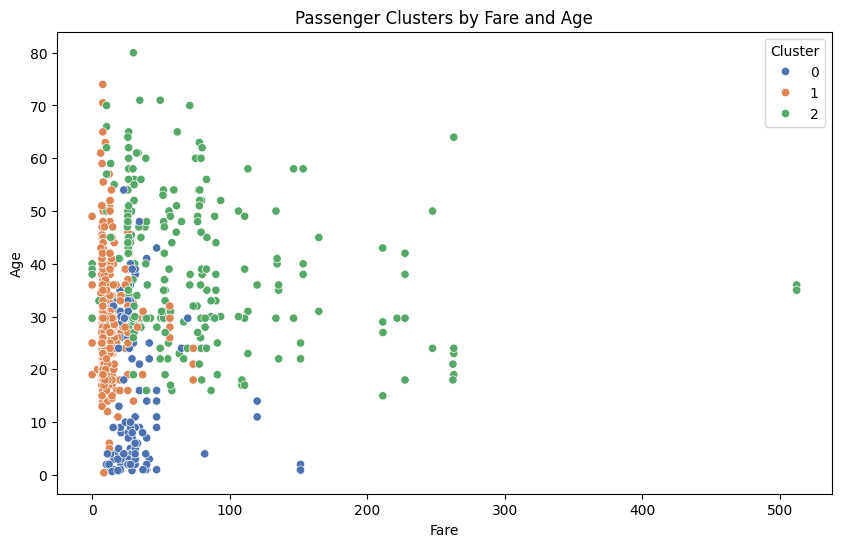


Cluster Distribution:
Pclass     1    2    3  All
Cluster                    
0          6   36   91  133
1          0  124  400  524
2        210   24    0  234
All      216  184  491  891


In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters to match passenger classes
kmeans.fit(X_scaled)

# Add cluster labels to our data
X['Cluster'] = kmeans.labels_

# Visualize results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='Fare', y='Age', hue='Cluster', palette='deep')
plt.title('Passenger Clusters by Fare and Age')
plt.show()

# Compare clusters with actual classes
print("\nCluster Distribution:")
print(pd.crosstab(X['Cluster'], X['Pclass'], margins=True))

#### Principal Components Analysis (PCA)
Principal Components Analysis (PCA) is a technique used to reduce the dimensionality of a dataset by projecting it onto a lower-dimensional space. It works by finding the eigenvectors and eigenvalues of the covariance matrix of the data and then using these to project the data onto a lower-dimensional space. It's particularly good for:
- Visualizing high-dimensional data
- Reducing the number of features in a dataset
- When you have a large number of features

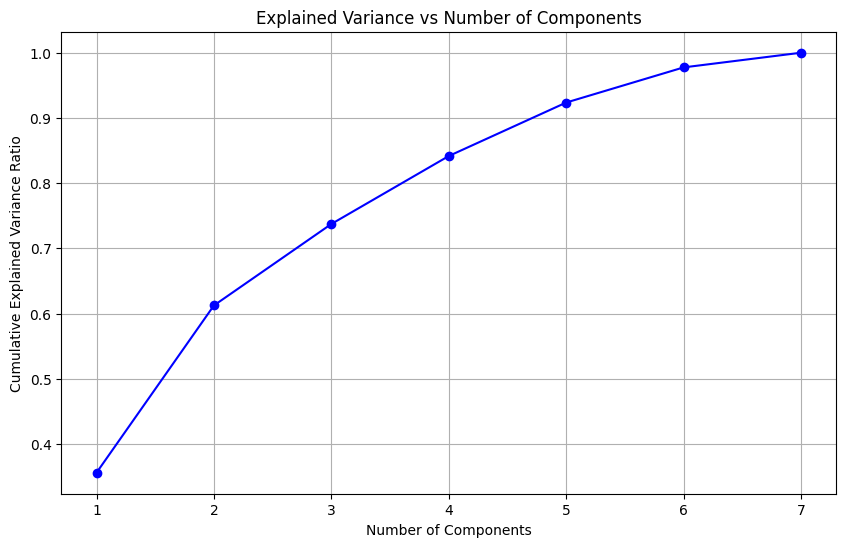

Component 1: 0.356 of variance explained
Component 2: 0.257 of variance explained
Component 3: 0.125 of variance explained
Component 4: 0.104 of variance explained
Component 5: 0.082 of variance explained
Component 6: 0.054 of variance explained
Component 7: 0.022 of variance explained


In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Look at explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

# Print explained variance for each component
for i, var in enumerate(explained_variance):
    print(f'Component {i+1}: {var:.3f} of variance explained')

#### DBSCAN
DBSCAN is a type of unsupervised learning algorithm that works by finding the density of the data points in the training set and then using this to predict the label of the new data point. It's particularly good for:
- Predicting categorical outcomes (like whether a customer will buy a product, if an email is spam, or in our Titanic case - whether a passenger survived).
- Cases where the data is not linearly separable
- When you have a small training set

Number of clusters: 22
Number of noise points: 251


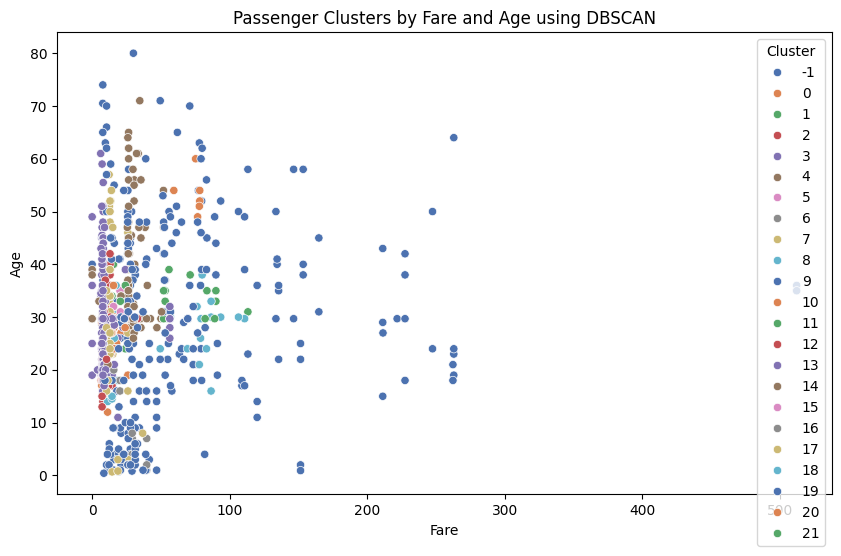

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to our data
X['Cluster'] = clusters

# Print number of clusters found (excluding noise points labeled as -1)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {list(clusters).count(-1)}')

# Visualize results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='Fare', y='Age', hue='Cluster', palette='deep')
plt.title('Passenger Clusters by Fare and Age using DBSCAN')
plt.show()